In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix
import random
import math
import xpress  as xp

Using the Community license in this session. If you have a full Xpress license, first set the XPAUTH_PATH environment variable to the full path to your license file, xpauth.xpr, and then restart Python. If you want to use the FICO Community license and no longer want to see this message, set the XPAUTH_PATH environment variable to: /home/andrea/anaconda3/lib/python3.9/site-packages/xpress/license/community-xpauth.xpr
NB: setting XPAUTH_PATH will also affect any other Xpress products installed on your system.


In [21]:
# input
C = 8
L = 2

custom_setup = True
ratio_locker_customers = 0.3
ratio_prime_door_to_door_customer = 0.4

In [22]:
# define the locations of customers and lockers
C_location = np.array([[0.1 ,0.1], [0.2 ,0.3],[0.15 ,0.7], [0.3 ,0.7],[0.8 ,0.6],
                       [0.9 ,0.5],[0.7 ,0.3], [0.4, 0.15]])
W_location = np.array([[0.6 ,0.5]])
L_location = np.array([[0.3 ,0.5],[0.5,0.2]])

In [23]:
def find_nearest_lockers_from_customer(customer_location, lockers_location):
    pass


In [24]:
# Customers’ demand and preferences
q = np.ones(C)

# define all the stores: eg. stores = [W, L0, L1, .... , Lx]
warehouse = ["W"]
lockers = []
for l in range(L):
    lockers.append("L"+str(l))
stores = warehouse+lockers

if custom_setup:
    C_L = [0, 5, 7]
    C_D = [1, 2, 3, 4, 6]
    S_k =[1, 2, 6]
    a_k = ["L0", "W", "L1"]
else:
    C_L = []
    C_D = []
    S_k = []
    a_k = []
    for client in C:
        if random.random()  <= ratio_locker_customers :
            # locker customer
            C_L.append(client)
            a_k.append(random.choice(stores)) # TODO assign not a random store but the one that in most case is the nearest to the customer
        else:
            # door to door customer
            C_D.append(client)
            if random.random() >= ratio_prime_door_to_door_customer:
                S_k.append(client)


In [25]:
# Capacities

# PF vehicles capacities
Q = math.ceil(0.5 * len(C_D))
# locker storage (every locker has the same capacity by default)
W_l = []
for i in range(L):
    W_l.append(math.ceil(0.8 * C / L))
# LF vehicles capacities (every LF vehicle has the same capacity by default)
Q_l = []
for i in range(L):
    Q_l.append(math.ceil(0.6 * W_l[i]))

sum_W_l = 0
for i in range(len(W_l)):
    sum_W_l += W_l[i]


# supply vehicles storage
Q_L = math.ceil(0.8 * sum_W_l)

print("Q: ",Q)
print("W_l: ",W_l)
print("Q_l: ",Q_l)
print("Q_L: ",Q_L)
print("sum_W_l: ", sum_W_l)


Q:  3
W_l:  [4, 4]
Q_l:  [3, 3]
Q_L:  7
sum_W_l:  8


['Cl0', 'Cl1', 'Cl2']
['Cd0', 'Cd1', 'Cd2', 'Cd3', 'Cd4']
['Cd0', 'Cd1', 'Cd2', 'Cd3', 'Cd4', 'Cl0', 'Cl1', 'Cl2']


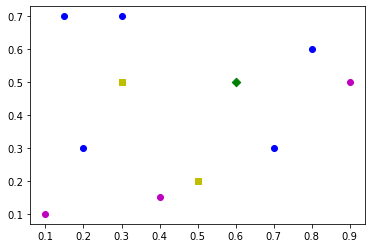

In [26]:
CD_location = np.array([[0,0]])
CL_location = np.array([[0,0]])

for i in range(C):
    if i in  C_D:
        CD_location=np.vstack([CD_location, C_location[i]])
    else:
        CL_location = np.vstack([CL_location, C_location[i]])

CD_location = np.delete(CD_location, 0, 0)
CL_location = np.delete(CL_location, 0, 0)

#define all customers
Customers = []
Customers_door = []
Customers_locker = []
for c in range(len(C_D)):
    Customers_door.append("Cd"+str(c))
for c in range(len(C_L)):
    Customers_locker.append("Cl"+str(c))

Customers = Customers_door+Customers_locker

print(Customers_locker)
print(Customers_door)
print(Customers)

plt.scatter(CD_location[:,0],CD_location[:,1],color='b')
plt.scatter(CL_location[:,0],CL_location[:,1],color='m')
plt.scatter(W_location[:,0],W_location[:,1],color='g',marker='D')
plt.scatter(L_location[:,0],L_location[:,1],color ='y',marker='s')

#piccola nota
#come nel paper in verde è la warehouse, in giallo i locker, mentre in blu in customer door to door e in magenta i customer locker

In [27]:
#calcolo la matrice delle distanze:
all_locations = np.array([])
all_locations = np.append(all_locations,W_location)
all_locations = np.vstack([all_locations,L_location])
all_locations = np.vstack([all_locations,CD_location])
all_locations = np.vstack([all_locations,CL_location])

all_buildings = stores + Customers

df = pd.DataFrame(all_locations, columns=['xcord', 'ycord'], index=all_buildings)
dist_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
matrix_distance_converted_in_numpy =dist_matrix.to_numpy()
print(dist_matrix)

            W        L0        L1       Cd0       Cd1       Cd2       Cd3  \
W    0.000000  0.300000  0.316228  0.447214  0.492443  0.360555  0.223607   
L0   0.300000  0.000000  0.360555  0.223607  0.250000  0.200000  0.509902   
L1   0.316228  0.360555  0.000000  0.316228  0.610328  0.538516  0.500000   
Cd0  0.447214  0.223607  0.316228  0.000000  0.403113  0.412311  0.670820   
Cd1  0.492443  0.250000  0.610328  0.403113  0.000000  0.150000  0.657647   
Cd2  0.360555  0.200000  0.538516  0.412311  0.150000  0.000000  0.509902   
Cd3  0.223607  0.509902  0.500000  0.670820  0.657647  0.509902  0.000000   
Cd4  0.223607  0.447214  0.223607  0.500000  0.680074  0.565685  0.316228   
Cl0  0.640312  0.447214  0.412311  0.223607  0.602080  0.632456  0.860233   
Cl1  0.300000  0.600000  0.500000  0.728011  0.776209  0.632456  0.141421   
Cl2  0.403113  0.364005  0.111803  0.250000  0.604152  0.559017  0.602080   

          Cd4       Cl0       Cl1       Cl2  
W    0.223607  0.640312  0.30

In [28]:
#filter data

supply_distances_matrix = dist_matrix.filter(items=stores,axis=1)
supply_distances_matrix  = supply_distances_matrix.filter(items=stores,axis=0)
print(supply_distances_matrix)

PF_distances_matrix = dist_matrix.filter(items=['W']+Customers_door,axis=1)
PF_distances_matrix = PF_distances_matrix.filter(items=['W']+Customers_door,axis=0)
print(PF_distances_matrix)

LF_distances_matrix = dist_matrix.filter(items=lockers+Customers_door,axis=1)
LF_distances_matrix = LF_distances_matrix.filter(items=lockers+Customers_door,axis=0)
print(LF_distances_matrix)

           W        L0        L1
W   0.000000  0.300000  0.316228
L0  0.300000  0.000000  0.360555
L1  0.316228  0.360555  0.000000
            W       Cd0       Cd1       Cd2       Cd3       Cd4
W    0.000000  0.447214  0.492443  0.360555  0.223607  0.223607
Cd0  0.447214  0.000000  0.403113  0.412311  0.670820  0.500000
Cd1  0.492443  0.403113  0.000000  0.150000  0.657647  0.680074
Cd2  0.360555  0.412311  0.150000  0.000000  0.509902  0.565685
Cd3  0.223607  0.670820  0.657647  0.509902  0.000000  0.316228
Cd4  0.223607  0.500000  0.680074  0.565685  0.316228  0.000000
           L0        L1       Cd0       Cd1       Cd2       Cd3       Cd4
L0   0.000000  0.360555  0.223607  0.250000  0.200000  0.509902  0.447214
L1   0.360555  0.000000  0.316228  0.610328  0.538516  0.500000  0.223607
Cd0  0.223607  0.316228  0.000000  0.403113  0.412311  0.670820  0.500000
Cd1  0.250000  0.610328  0.403113  0.000000  0.150000  0.657647  0.680074
Cd2  0.200000  0.538516  0.412311  0.150000  0.000

In [29]:
# Delivery Cost
pi = 1
pi_l = 0.85
pi_L = 0.75
ro = 0.5
PF_delivery_cost = pi*PF_distances_matrix
LF_delivery_cost = pi_l*LF_distances_matrix
supply_cost = pi_L*supply_distances_matrix
print(supply_cost)
print(PF_delivery_cost)
print(LF_delivery_cost)

           W        L0        L1
W   0.000000  0.225000  0.237171
L0  0.225000  0.000000  0.270416
L1  0.237171  0.270416  0.000000
            W       Cd0       Cd1       Cd2       Cd3       Cd4
W    0.000000  0.447214  0.492443  0.360555  0.223607  0.223607
Cd0  0.447214  0.000000  0.403113  0.412311  0.670820  0.500000
Cd1  0.492443  0.403113  0.000000  0.150000  0.657647  0.680074
Cd2  0.360555  0.412311  0.150000  0.000000  0.509902  0.565685
Cd3  0.223607  0.670820  0.657647  0.509902  0.000000  0.316228
Cd4  0.223607  0.500000  0.680074  0.565685  0.316228  0.000000
           L0        L1       Cd0       Cd1       Cd2       Cd3       Cd4
L0   0.000000  0.306472  0.190066  0.212500  0.170000  0.433417  0.380132
L1   0.306472  0.000000  0.268794  0.518779  0.457739  0.425000  0.190066
Cd0  0.190066  0.268794  0.000000  0.342646  0.350464  0.570197  0.425000
Cd1  0.212500  0.518779  0.342646  0.000000  0.127500  0.559000  0.578062
Cd2  0.170000  0.457739  0.350464  0.127500  0.000

## extra code to delete

In [ ]:
x = np.random.randint(0, 50, 7)
y = np.random.randint(0, 50, 7)
C = [x,y]
plt.scatter(C[0],C[1])
C = np.arange(7)
print(C)
plt.show()

In [ ]:
C = np.random.rand(7,2)
plt.scatter(C[:,0],C[:,1],color='b')
W = np.random.rand(1,2)
plt.scatter(W[:,0],W[:,1],color='g',marker='D')
L = np.random.rand(1,2)
plt.scatter(L[:,0],L[:,1],color ='y',marker='s')
print(C)

In [ ]:
C = np.array([[0.1 ,0.1], [0.2 ,0.3],[0.15 ,0.7], [0.3 ,0.7],[0.8 ,0.6],
              [0.9 ,0.5],[0.7 ,0.3]])
plt.scatter(C[:,0],C[:,1],color='b')
W = np.array([[0.6 ,0.5]])
plt.scatter(W[:,0],W[:,1],color='g',marker='D')
L = np.array([[0.3 ,0.5]])
plt.scatter(L[:,0],L[:,1],color ='y',marker='s')

In [ ]:
#calcolo la matrice delle distanze:
data = np.array([])
data = np.append(data,W)
data = np.vstack([data,L])
data = np.vstack([data,C])
buildings =['Warehouse','Locker','c1','c2','c3','c4','c5','c6','c7']
print(len(data))
df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=buildings)
dist_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
matrix_distance_converted_in_numpy =dist_matrix.to_numpy()

In [ ]:
# Delivery Cost
pi = 1
pi_l = 0.85
pi_L = 0.75
ro = 0.5
PF_delivery_cost = pi*matrix_distance_converted_in_numpy
LF_delivery_cost = pi_l*matrix_distance_converted_in_numpy
PF_delivery_cost = pi*matrix_distance_converted_in_numpy
Suplly_cost = pi_L*matrix_distance_converted_in_numpy


In [ ]:
# Delivery Cost
pi = 1
pi_l = 0.85
pi_L = 0.75
ro = 0.5
PF_delivery_cost = pi*matrix_distance_converted_in_numpy
LF_delivery_cost = pi_l*matrix_distance_converted_in_numpy
PF_delivery_cost = pi*matrix_distance_converted_in_numpy
Suplly_cost = pi_L*matrix_distance_converted_in_numpy


In [ ]:
# Delivery Cost
pi = 1
pi_l = 0.85
pi_L = 0.75
ro = 0.5
PF_delivery_cost = pi*matrix_distance_converted_in_numpy
LF_delivery_cost = pi_l*matrix_distance_converted_in_numpy
PF_delivery_cost = pi*matrix_distance_converted_in_numpy
Suplly_cost = pi_L*matrix_distance_converted_in_numpy
